In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
world_cup = pd.read_csv('/content/drive/My Drive/Datasets/Worlds Cup Datasets/WorldCups.csv')
world_cup_players = pd.read_csv('/content/drive/My Drive/Datasets/Worlds Cup Datasets/WorldCupPlayers.csv')
world_cup_matches = pd.read_csv('/content/drive/My Drive/Datasets/Worlds Cup Datasets/WorldCupMatches.csv')

# 1) Realizar un análisis exploratorio de los datos identificando la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas.


##### 1.1) Analisis Dataset **World_Cup.**
El dataset __World_Cup__ no cuenta con datos nulos(vacios). Este dataset cuenta con todos los mundiales jugados desde 1930 hasta el 2014, muestra país donde se jugó, campeón, subcampeón, tercer y cuarto lugar. Ademas de, cantidad de goles anotados, equipos calificados, partidos jugados y audiencia.

In [139]:
print(f'Cantidad de filas y columnas que contiene el datasets: {world_cup.shape}')
print(f'\nCantidad de datos nulos: \n{world_cup.isnull().sum()}')
print('\nMostramos las primeras 5 filas del Dataset:')
display(world_cup.head())
print('\nTipos de datos que contienen las columnas del Dataset:')
display(world_cup.dtypes)

Cantidad de filas y columnas que contiene el datasets: (20, 10)

Cantidad de datos nulos: 
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

Mostramos las primeras 5 filas del Dataset:


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607



Tipos de datos que contienen las columnas del Dataset:


Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

Observamos al hacer un __.dtypes__ al dataset para analizar los typos de datos, que __Attendance__ es una columna que almacena variables tipo __"Object"__ y en el caso de usarla como variable cuantificable no podremos ya que es un __string__ para ello usaremos __.replace__ para quitar los puntos y __.astype__ para cambiar a un número entero (__int__)

In [0]:
world_cup['Attendance']=world_cup['Attendance'].str.replace(".",'').astype(int)

In [141]:
world_cup.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance         int64
dtype: object

* __Variables Categóricas__: Year, Country, Winner, Runners-Up, Third, Fourth
* __Variables Cuantitativas__: GoalsScored, QualifiedTeams, MatchesPlayed, Attendance

##### 1.2) Analisis Dataset **world_cup_matches.**

El dataset __world_cup_matches__ cuenta con un total 4572 filas, de las cuales hay 3720 filas vacias o nulas y estos se pueden ver  en todas sus columnas.


In [142]:
print(f'Cantidad de filas y columnas que contiene el datasets: {world_cup_matches.shape}')
print(f'Cantidad de datos nulos: \n{world_cup_matches.isnull().sum()}')
print('\nMostramos las primeras 5 filas del Dataset:')
display(world_cup_matches.head())
print('\nTipos de datos que contienen las columnas del Dataset:')
display(world_cup_matches.dtypes)

Cantidad de filas y columnas que contiene el datasets: (4572, 20)
Cantidad de datos nulos: 
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

Mostramos las primeras 5 filas del Dataset:


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA



Tipos de datos que contienen las columnas del Dataset:


Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

* __Variables Categóricas__: Year, Datetime, Stage, Stadium, City, Home Team Name, Away Team Name, Referee, Assistant 1, Assistant 2, RoundID, MatchID, Home Team Initials, Away Team Initials
* __Variables Cuantitativas__: Home Team Goals, Away Team Goals, Attendance, Half-time Home Goals, Half-time Away Goals

Usaremos la columna __'Year'__ y el comando __'isnull'__ junto con __'np.where'__ para saber la ubicacion de los datos nulos o vacios.

In [143]:
donde=world_cup_matches.isnull()
np.where(donde['Year']==True)

(array([ 852,  853,  854, ..., 4569, 4570, 4571]),)

Podemos observar que de la fila 852 en adelante hay datos vacios, asi que haremos un __slice(tajada)__ desde la fila anterior para observar la composicion de los datos

In [144]:
world_cup_matches[851:]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos como de la fila 852 en adelante, no hay datos, asi que usaremos el comando __dropna__ para eliminar todas las filas que tengan de $3$ a más datos nulos o vacios y asi solo eliminar las filas vacias y no las que tienen datos que nos sirvan.

In [0]:
world_cup_matches.dropna(thresh=3,inplace=True)

In [0]:
world_cup_matches.drop_duplicates(inplace=True)

In [147]:
world_cup_matches.shape

(836, 20)

Ahora podemos observar que al dataset __world_cup_matches__ le queda solo un null o vacio(nan) y con los datos que corresponden, podemos rellenar el ultimo nan con la media de la columna, y asi tendremos todos los datos. Mostrando un total de 836 filas y 20 columnas sin datos nulos.

In [148]:
print(f'Cantidad de filas y columnas que contiene el datasets: {world_cup_matches.shape}')
print(f'Cantidad de datos nulos: \n{world_cup_matches.isnull().sum()}')
display(world_cup_matches.head())

Cantidad de filas y columnas que contiene el datasets: (836, 20)
Cantidad de datos nulos: 
Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              1
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [149]:
np.where(world_cup_matches['Attendance'].isnull()==True)

(array([823]),)

En la fila __823__ se encuentra ese dato nulo el cual esta resaltado con amarillo

In [150]:
world_cup_matches[822:824].style.highlight_null(null_color='yellow')

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
822,2014,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2,0,Nigeria,,67882,0,0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951,3.00186e+08,FRA,NGA
823,2014,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2,1,Algeria,Germany win after extra time,nan,0,0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951,3.00186e+08,GER,ALG


In [0]:
world_cup_matches.fillna(np.mean(world_cup_matches['Attendance']),inplace=True)

##### 1.3) Analisis Dataset **world_cup_players.**
El dataset __world_cup_players__ Cuenta con un total de 37784 filas y 9 columnas,hay 2 columnas que cuentan con datos nulos o vacios **Position** (33641 nulos o vacios, los cuales representan el 89% de la columna) y **Event** pero solo eliminaremos **Position**

In [152]:
print(f'Cantidad de filas y columnas que contiene el datasets: {world_cup_players.shape}')
print(f'Cantidad de datos nulos: \n{world_cup_players.isnull().sum()}')
print('\nMostramos las primeras 5 filas del Datset:')
display(world_cup_players.head())
print('\nTipos de datos que contienen las columnas del Dataset:')
display(world_cup_players.dtypes)

Cantidad de filas y columnas que contiene el datasets: (37784, 9)
Cantidad de datos nulos: 
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

Mostramos las primeras 5 filas del Datset:


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN



Tipos de datos que contienen las columnas del Dataset:


RoundID           int64
MatchID           int64
Team Initials    object
Coach Name       object
Line-up          object
Shirt Number      int64
Player Name      object
Position         object
Event            object
dtype: object

* __Variables Categóricas__: El dataset __world_cup_players__ solo tiene variables categóricas.
* __Variables Cuantitativas__: El datset __world_cup_players__ no tiene variables Cuantitativas.

Veamos cual es el porcentaje que representan las datos nulos en las columnas

In [153]:
porcentaje = (world_cup_players.isnull().sum()/len(world_cup_players))*100
porcentaje

RoundID           0.000000
MatchID           0.000000
Team Initials     0.000000
Coach Name        0.000000
Line-up           0.000000
Shirt Number      0.000000
Player Name       0.000000
Position         89.035041
Event            75.997777
dtype: float64

Eliminaremos la columna __Position__, ya que para efectos de analisis no influirán

In [0]:
world_cup_players.drop(columns=['Position'], inplace=True)

In [155]:
world_cup_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN


# 2) Identifique y establezca un protocolo para tratar outliers.


##### 2.1) Analisis de Outliers de dataset __world_cup__
Este dataset contiene columnas que contienen variables __cuantitativas__, estas son: GoalsScored, QualifiedTeams, MatchesPlayed, Attendance

Para tratar un Outlier, primero identificamos las columnas que contienen datos __cuantitativos__, ya que estos pueden estar dentro o fuera de los parametros.

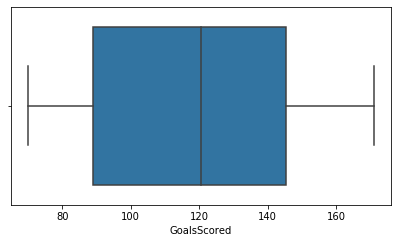

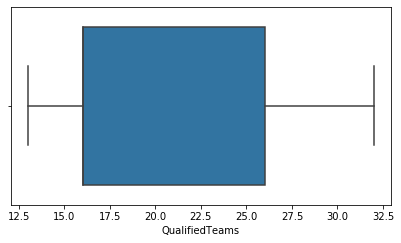

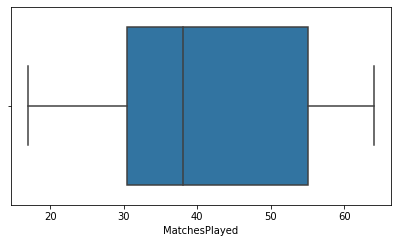

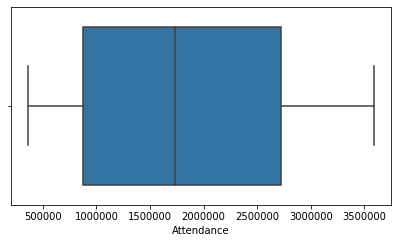

In [156]:
col_need=world_cup[['GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']]
for index, values in enumerate(col_need):
  plt.figure(figsize=(15,8))
  plt.subplot(2,2,index+1)
  sns.boxplot(col_need[values])

In [0]:
# np.where(world_cup > world_cup.mean()+5*world_cup.std())

##### 2.2) Analisis de Outliers de dataset __world_cup_matches__
Las columnas con variables cuantitativas de este dataset son: Home Team Goals, Away Team Goals, Attendance, Half-time Home Goals, Half-time Away Goals

Usaremos __Seaborn__ para graficar usando $Boxplots$ ya que son buenos para identificar __Outliers__ en un DataFrame.

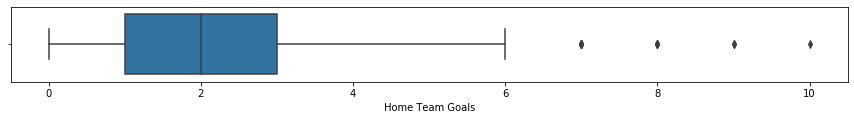

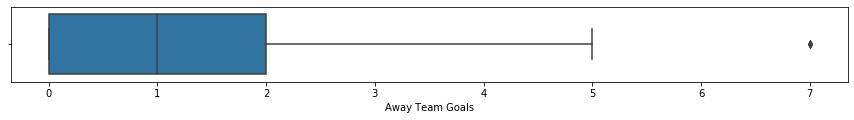

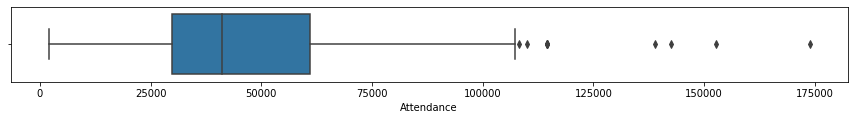

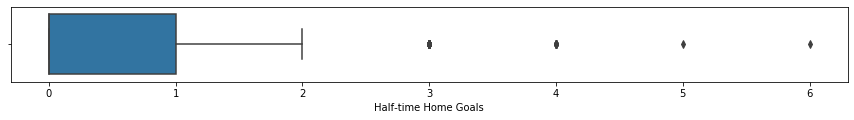

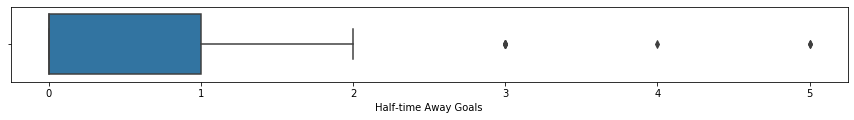

In [158]:
col_matches = world_cup_matches[['Home Team Goals','Away Team Goals', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals']]
for i, col in enumerate(col_matches):
  plt.figure(figsize=(15,8))
  plt.subplot(5,1,i+1)
  sns.boxplot(col_matches[col])

In [159]:
cant=len(world_cup_matches[world_cup_matches['Home Team Goals']>6])
print(f'Existen equipos que realizaron mas del promedio de 6 goles, los cuales son un total de {cant} equipos')

Existen equipos que realizaron mas del promedio de 6 goles, los cuales son un total de 15 equipos


Al analizar los datos, podemos concluir que existen datos que se escapan al promedio, pero son verdaderos, ya sea que en esos partidos realizaron goles arriba del promedio o la audiencia aumento a razon de los equipos que jugaban. No considero que existan __Outliers__

##### 2.3) Analisis de Outliers de dataset __world_cup_players__
Este dataset no cuenta con datos __Outliers__ ya que sus columnas contienen variables __Categóricas__ no __Cuantitativas__

In [160]:
world_cup_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN


# 3) Obtenga visualizaciones pertinentes a su análisis sobre los mundiales.


In [161]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


Cantidad de mundiales Ganados por un Equipo

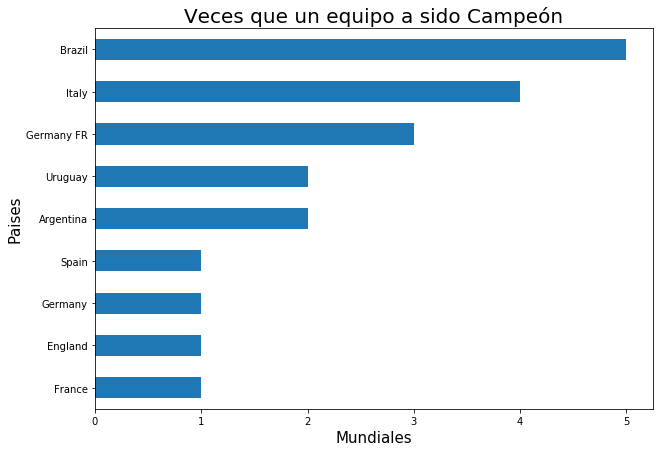

In [351]:
world_cup['Winner'].value_counts().sort_values().plot.barh(figsize=(10,7))
plt.title('Veces que un equipo a sido Campeón',fontdict={'fontsize':20})
plt.xlabel('Mundiales',fontdict={'fontsize':15})
plt.ylabel('Paises',fontdict={'fontsize':15});

Las veces que un equipo a quedado sub-Campeon

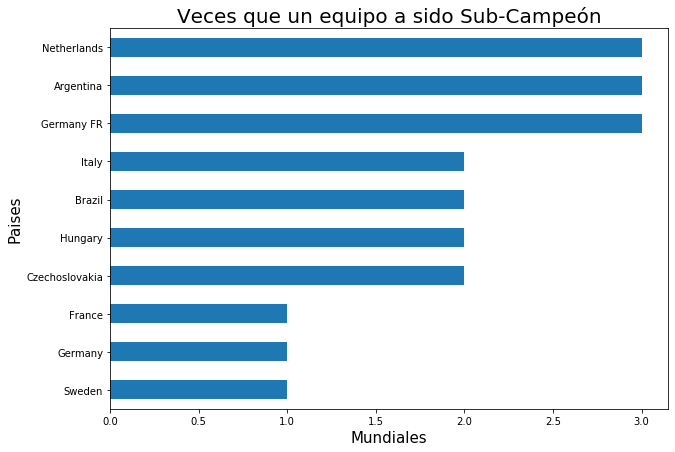

In [352]:
world_cup['Runners-Up'].value_counts().sort_values().plot.barh(figsize=(10,7))
plt.title('Veces que un equipo a sido Sub-Campeón',fontdict={'fontsize':20})
plt.xlabel('Mundiales',fontdict={'fontsize':15})
plt.ylabel('Paises',fontdict={'fontsize':15});

Cantidad de goles anotados en cada mundial

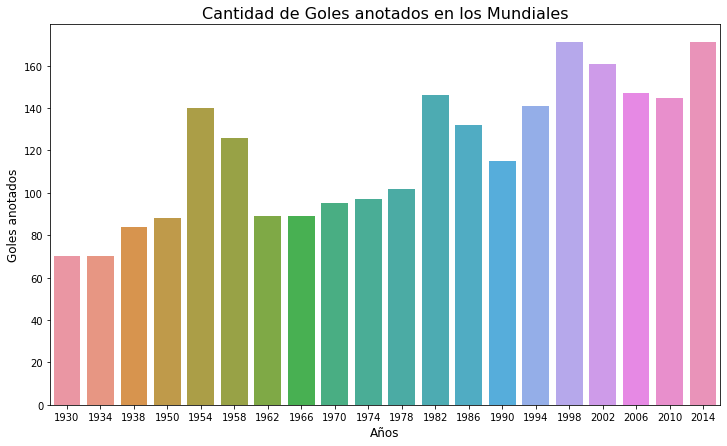

In [164]:
plt.figure(figsize=(12,7))
sns.barplot(x='Year',y='GoalsScored',data=world_cup);
plt.title('Cantidad de Goles anotados en los Mundiales',fontdict={'fontsize':16})
plt.xlabel('Años',fontdict={'fontsize':12})
plt.ylabel('Goles anotados',fontdict={'fontsize':12});

# 4) Hacer un análisis de la concurrencia de público para los años donde se disputó el mundial FIFA, repita lo anterior según los distintos horarios en los que se disputan los encuentros. Indique los partidos con mayor concurrencia de público.


In [165]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


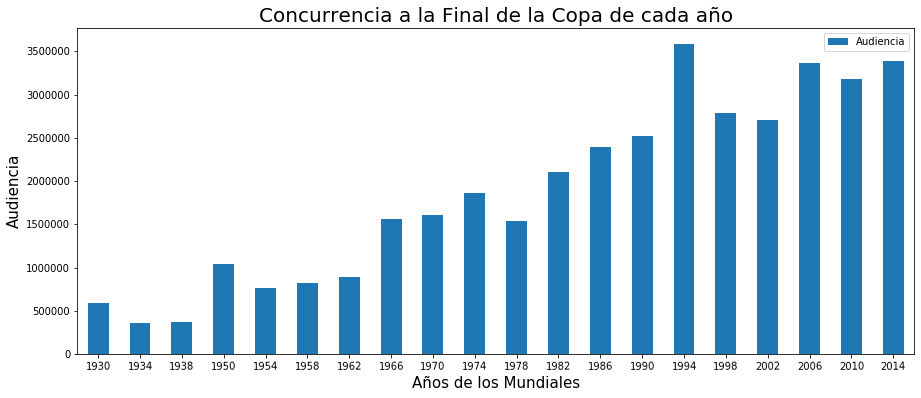

In [166]:
world_cup.plot.bar(x='Year', y='Attendance',rot=1, figsize=(15,6))
plt.ylabel('Audiencia',fontdict={'fontsize' : 15})
plt.xlabel('Años de los Mundiales',fontdict={'fontsize' : 15})
plt.title('Concurrencia a la Final de la Copa de cada año', fontdict={'fontsize' : 20})
plt.legend(['Audiencia']);

Los partidos con mayor Concurrencia de público de cada Mundial

In [404]:
world_cup_matches[['Year','City','Home Team Name','Away Team Name','Attendance']].loc[world_cup_matches.groupby('Year').Attendance.agg('idxmax')].reset_index(drop=True)

,Year,City,Home Team Name,Away Team Name,Attendance
0,1930,Montevideo,Uruguay,Yugoslavia,79867.0
1,1934,Rome,Italy,Czechoslovakia,55000.0
2,1938,Colombes,Italy,France,58455.0
3,1950,Rio De Janeiro,Uruguay,Brazil,173850.0
4,1954,Berne,Germany FR,Hungary,62500.0
5,1958,Gothenburg,Brazil,Soviet Union,50928.0
6,1962,Santiago De Chile,Brazil,Chile,76594.0
7,1966,London,England,France,98270.0
8,1970,Mexico City,Mexico,Belgium,108192.0
9,1974,Berlin West,Germany FR,Chile,81100.0


# 5) Visualice la cantidad de goles anotados por cada uno de los eventos mundialistas. Luego, muestre la distribución de los goles de local y visita. Comente sus resultados.


In [171]:
display(world_cup.groupby(['Year','Country'])['GoalsScored'].sum().reset_index().rename(columns={'GoalsScored':'Goles Anotados'}).style.highlight_max('Goles Anotados',color='yellow'))
print(f'Podemos observar los Mundiales donde se anotaron mas goles')

,Year,Country,Goles Anotados
0,1930,Uruguay,70
1,1934,Italy,70
2,1938,France,84
3,1950,Brazil,88
4,1954,Switzerland,140
5,1958,Sweden,126
6,1962,Chile,89
7,1966,England,89
8,1970,Mexico,95
9,1974,Germany,97


Podemos observar los Mundiales donde se anotaron mas goles


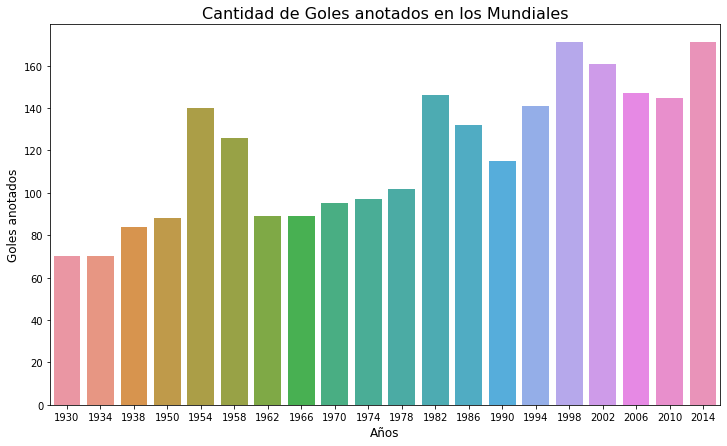

In [172]:
plt.figure(figsize=(12,7))
sns.barplot(x='Year',y='GoalsScored',data=world_cup);
plt.title('Cantidad de Goles anotados en los Mundiales',fontdict={'fontsize':16})
plt.xlabel('Años',fontdict={'fontsize':12})
plt.ylabel('Goles anotados',fontdict={'fontsize':12});

<!-- goals_home_away = world_cup_matches.groupby(['Home Team Name','Away Team Name'])[['Home Team Goals','Away Team Goals']].sum().reset_index() -->

Distribucion Goles de local y visita por año que se elija

In [0]:
w=world_cup_matches.groupby('Year')
a=w.get_group(2014)

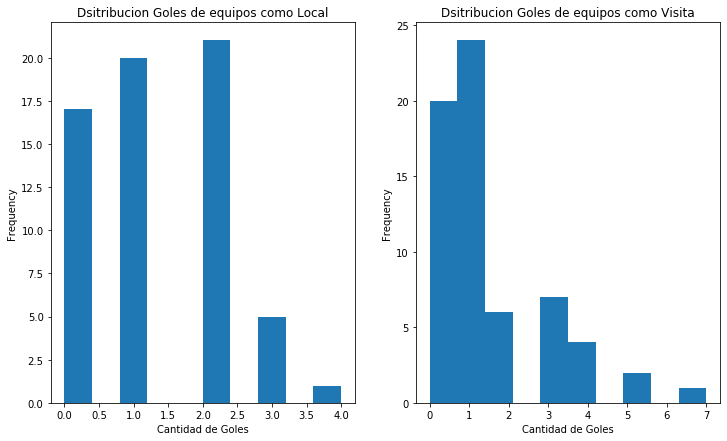

In [410]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
a['Home Team Goals'].plot.hist()
plt.title('Dsitribucion Goles de equipos como Local')
plt.xlabel('Cantidad de Goles')
plt.subplot(1,2,2)
a['Away Team Goals'].plot.hist()
plt.title('Dsitribucion Goles de equipos como Visita')
plt.xlabel('Cantidad de Goles');

# 6) Visualizar los resultados de los partidos por países (ganados, empatados, perdidos).


In [0]:
world_cup_matches_1 = world_cup_matches
world_cup_matches_1['Year']=world_cup_matches_1['Year'].astype(int)
world_cup_matches_1['Resultado'] = np.where(world_cup_matches['Home Team Goals']>world_cup_matches['Away Team Goals'],'Ganador',np.where(world_cup_matches['Home Team Goals']==world_cup_matches['Away Team Goals'],'Empate','Perdedor'))
grupos=world_cup_matches_1.groupby(['Year'])

##### **Opcion 1-** Despliegue de todos los graficos

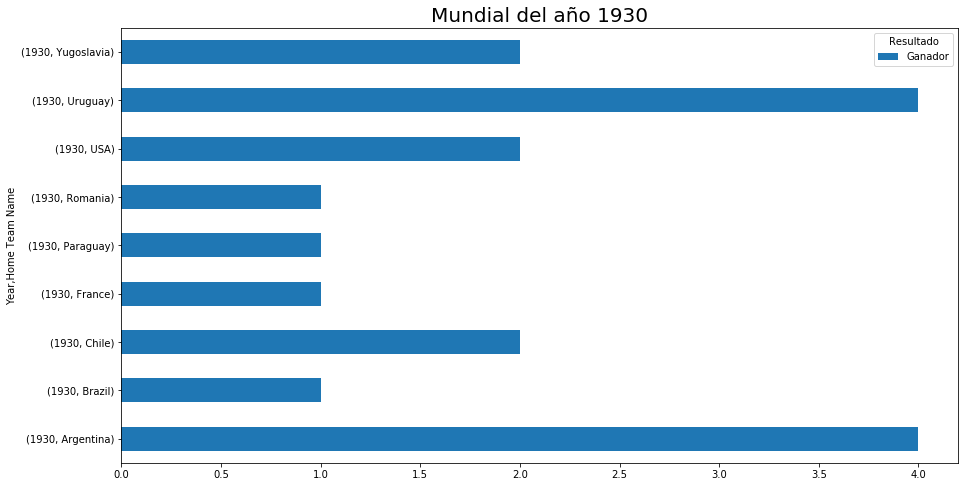

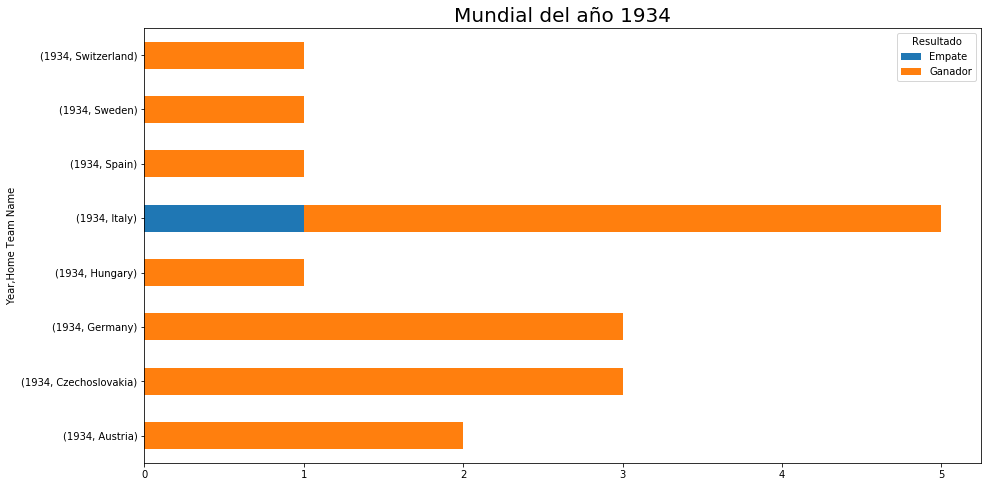

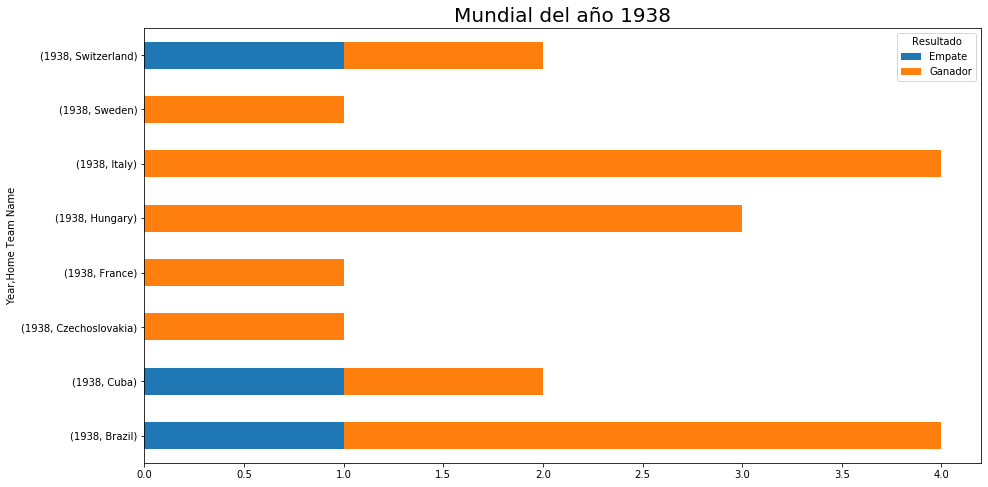

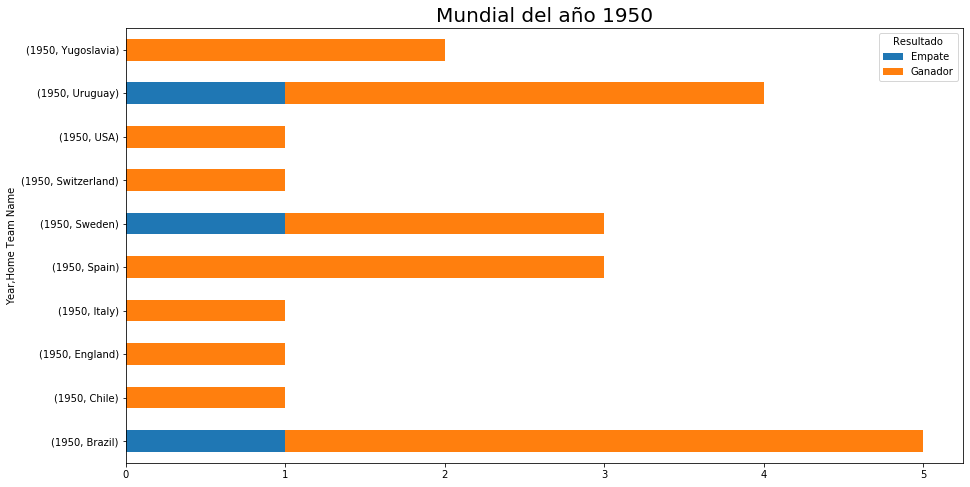

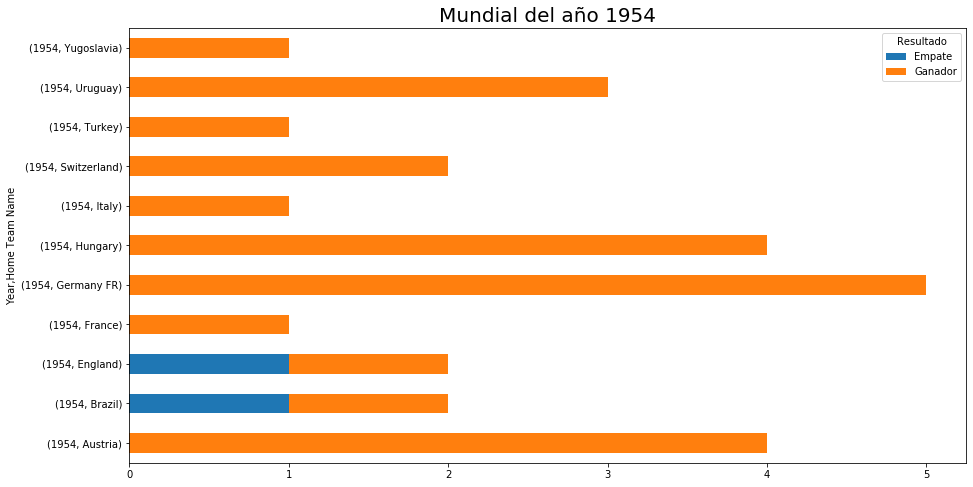

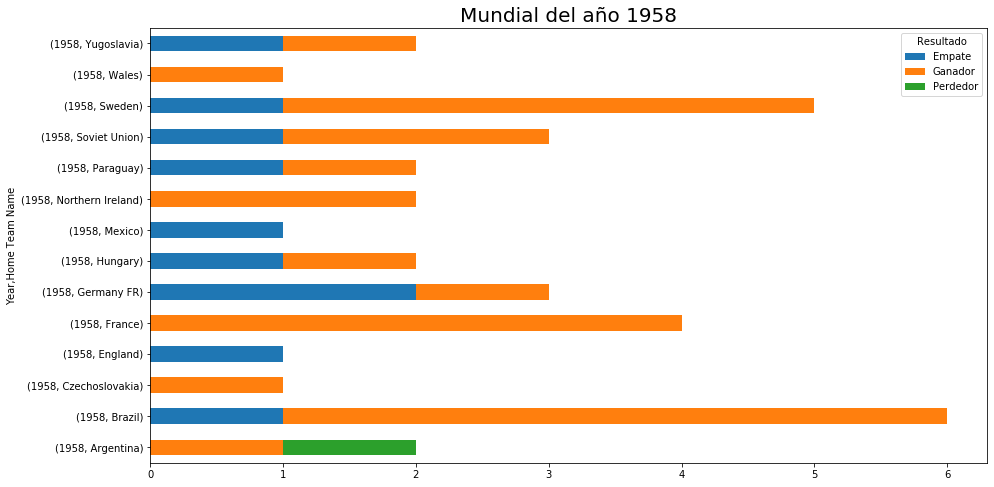

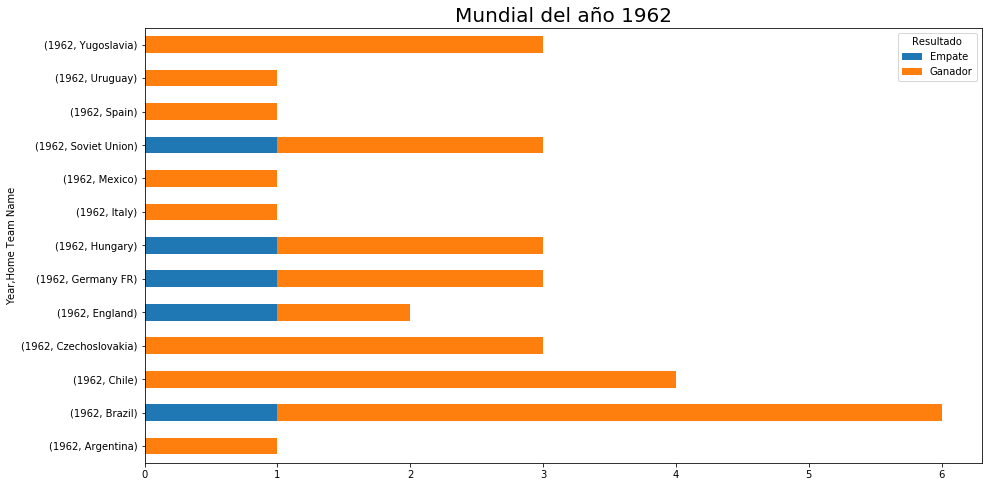

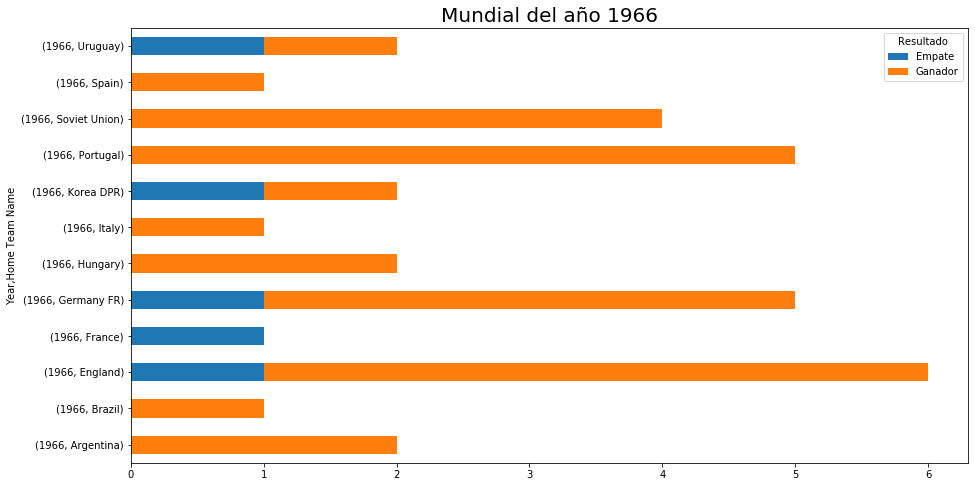

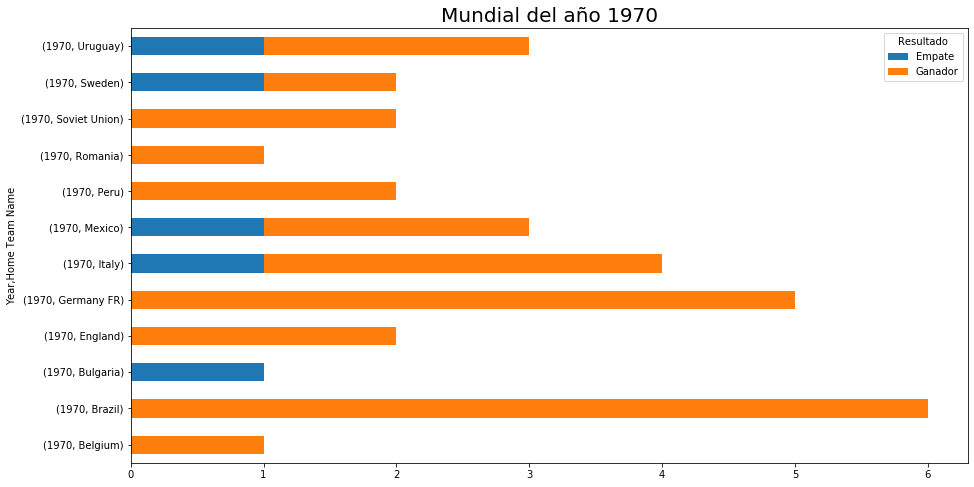

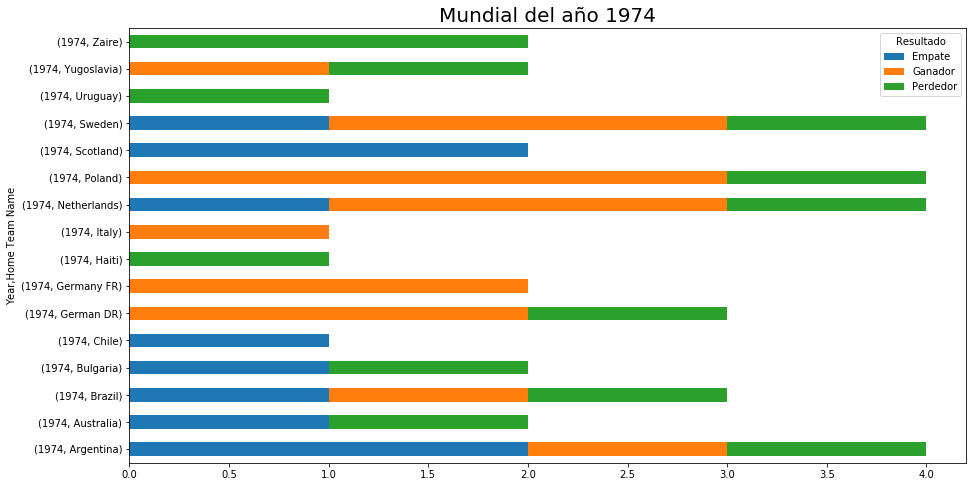

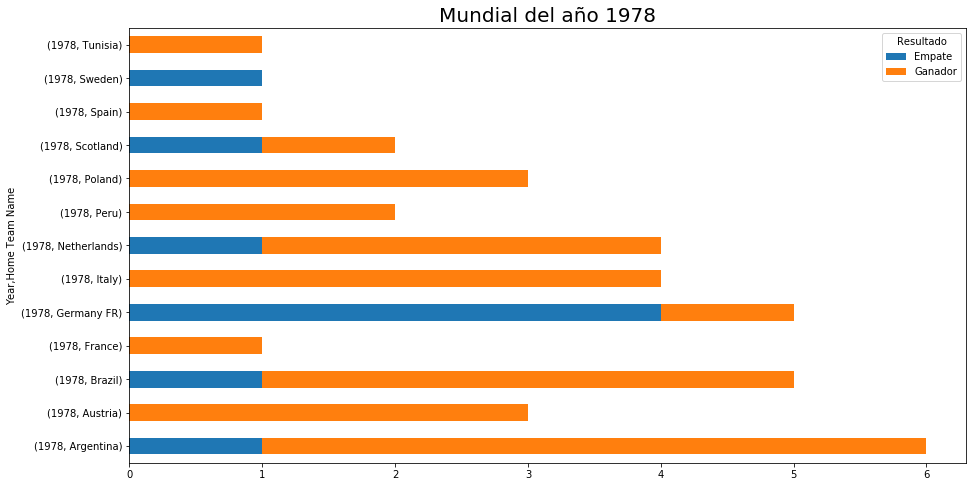

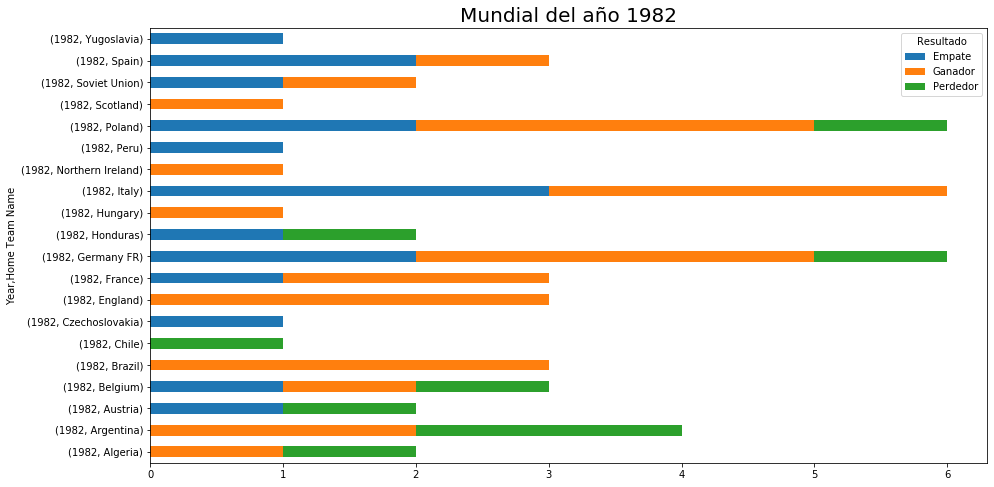

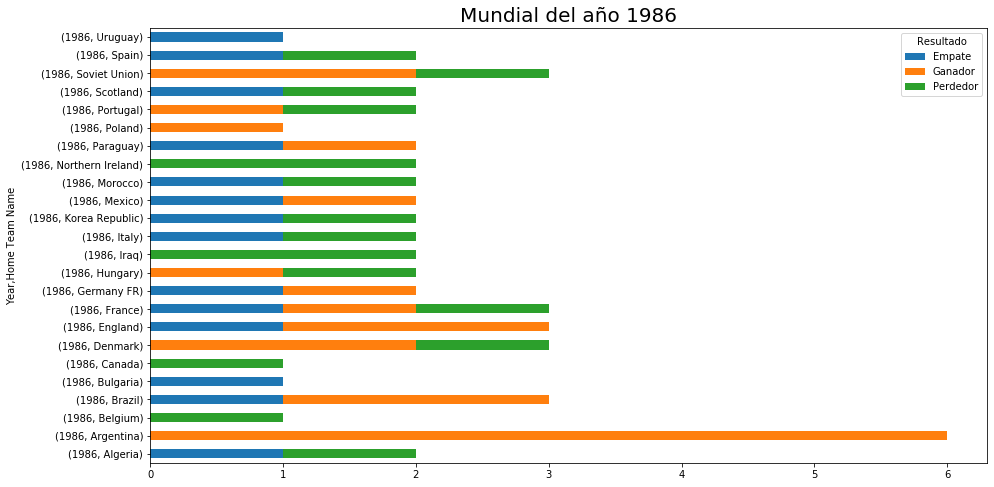

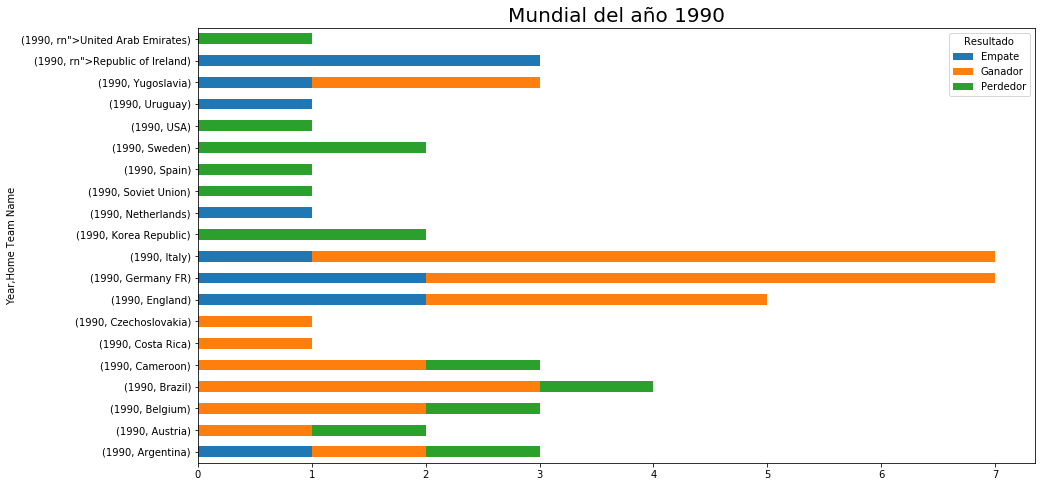

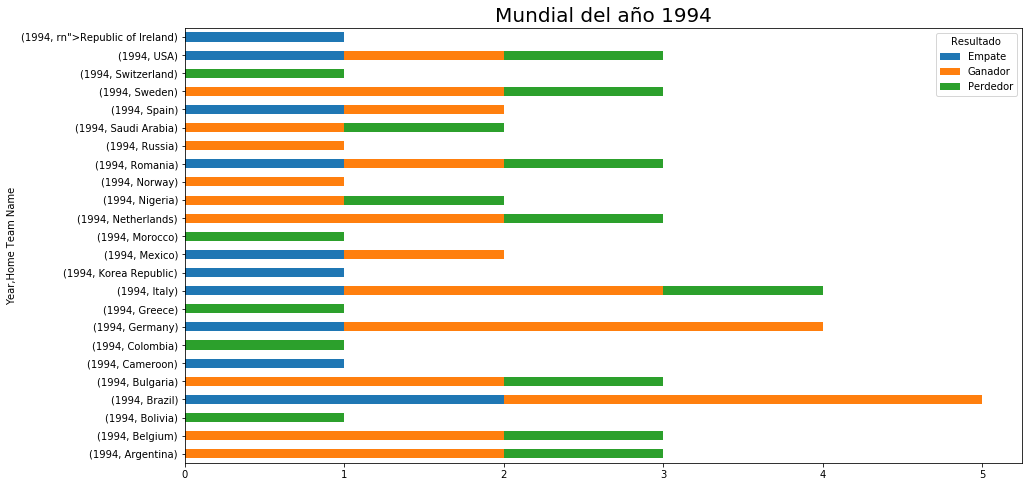

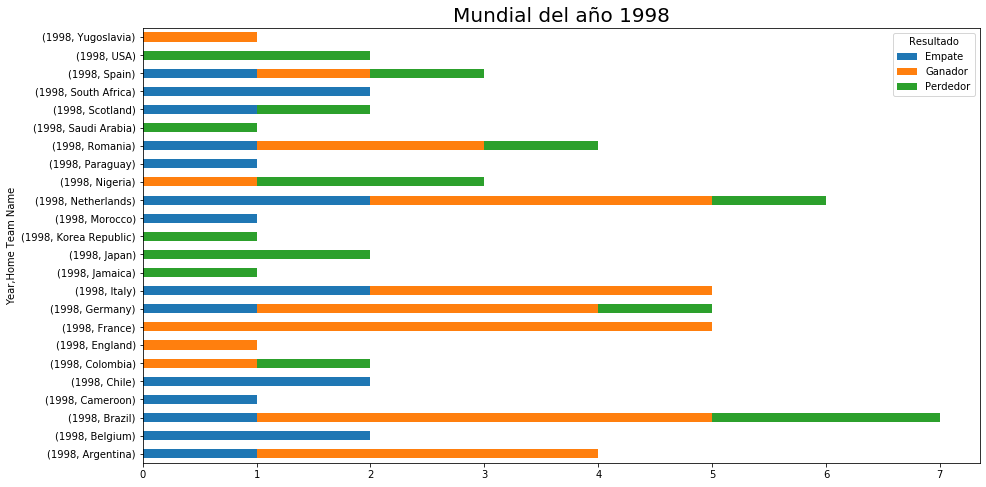

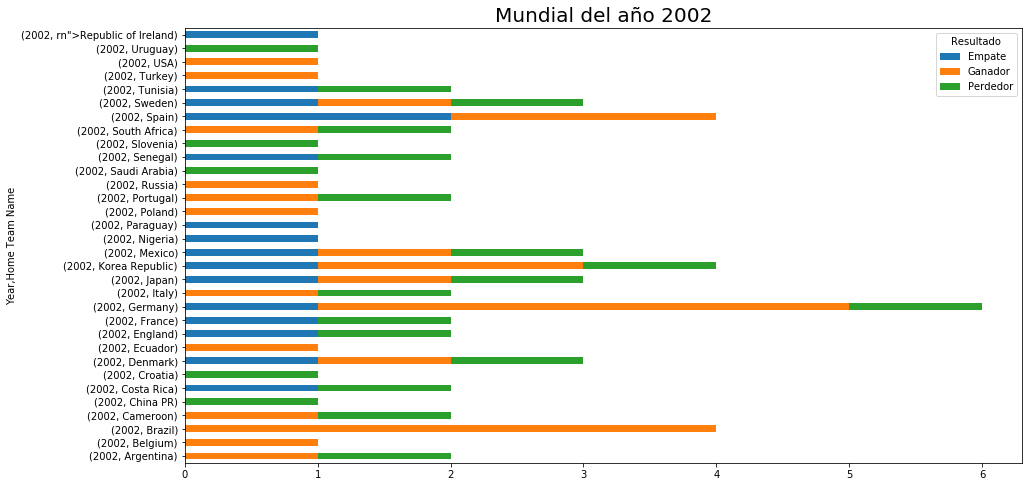

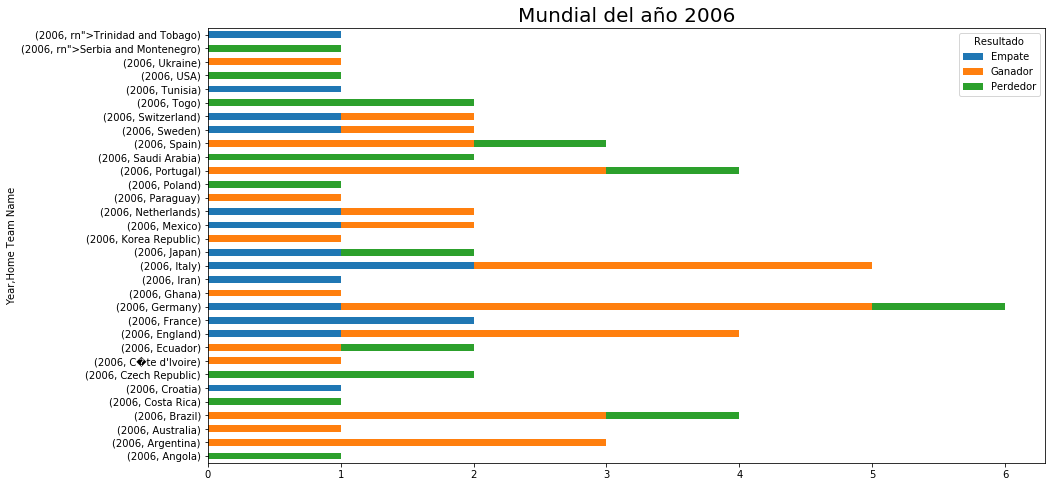

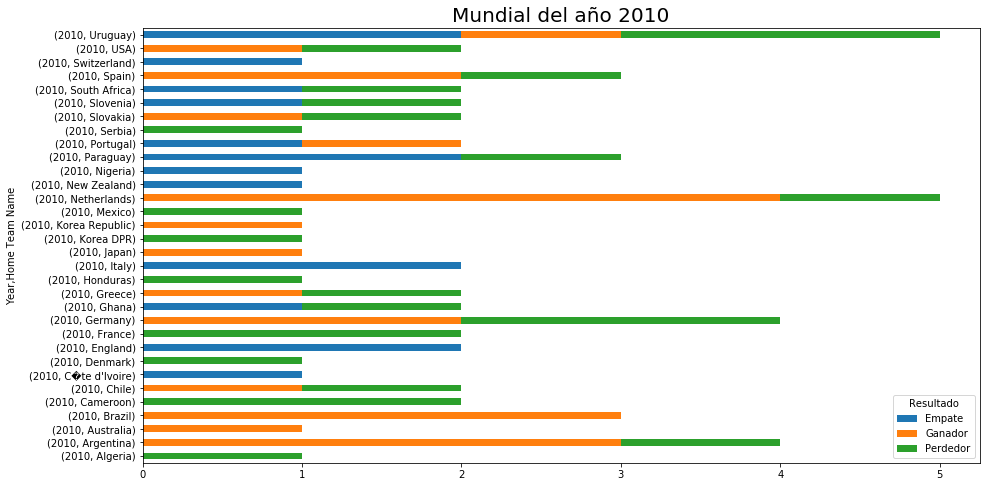

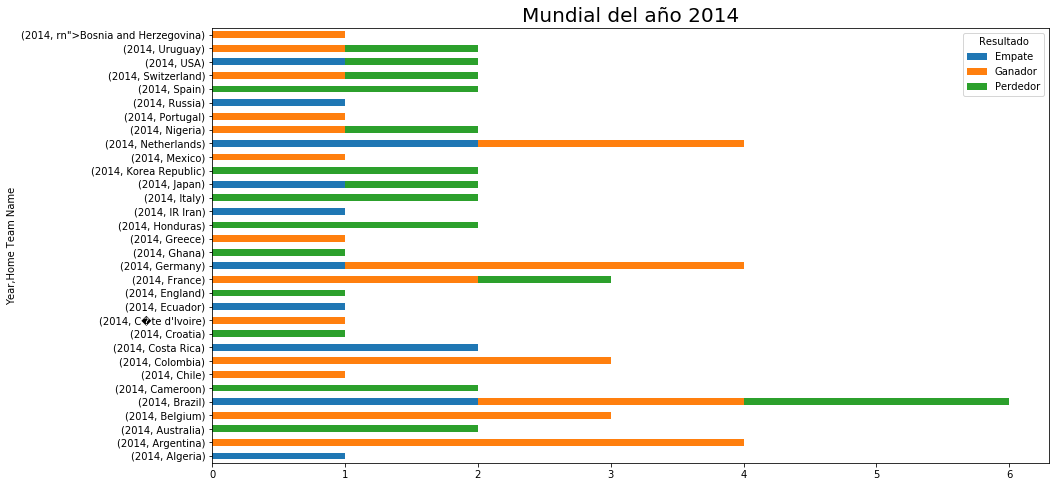

In [176]:
for name,group in grupos:
  year=grupos.get_group(name)
  pd.crosstab(index=[year['Year'],year['Home Team Name']],columns=year['Resultado'], margins=False).plot.barh(stacked=True ,figsize=(15,8))
  plt.title(f'Mundial del año {name}',fontdict={'fontsize':20});

##### **Opcion 2-** Menu para seleccionar el año del Mundial a visualizar

In [0]:
def graf(op):
  year=grupos.get_group(op)
  pd.crosstab(index=[year['Year'],year['Home Team Name']],columns=year['Resultado'], margins=False).plot.barh(stacked=True ,figsize=(15,8));
  plt.title(f'Mundial del año {op}',fontdict={'fontsize':20});

Ingrese año de Mundial a analizar :
 1) 1930
 2) 1934
 3) 1938
 4) 1950
 5) 1954
 6) 1958
 7) 1962
 8) 1966
 9) 1970
10) 1974
11) 1978
12) 1982
13) 1986
14) 1990
15) 1994
16) 1998
17) 2002
18) 2006
19) 2010
20) 2014:
2014


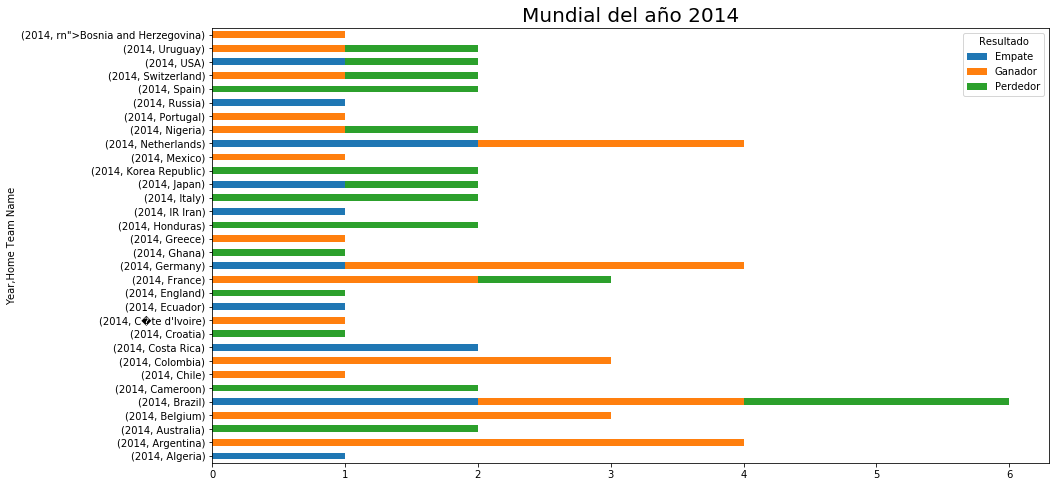

In [411]:
op=int(input('Ingrese año de Mundial a analizar :\n 1) 1930\n 2) 1934\n 3) 1938\n 4) 1950\n 5) 1954\n 6) 1958\n 7) 1962\n 8) 1966\n 9) 1970\n10) 1974\n11) 1978\n12) 1982\n13) 1986\n14) 1990\n15) 1994\n16) 1998\n17) 2002\n18) 2006\n19) 2010\n20) 2014:\n'))
graf(op)

<!-- 
world_cup_matches_2['Resultado'] = world_cup_matches_2['Home Team Goals'].apply(lambda x:'Ganador' if x > 0 else ('Empate' if x==0 else 'Perdedor')) 
-->

# 7) Realice tanto Cross - Table como Pivot - Table para mejorar su análisis en base a elementos como por ejemplo, año y ciudad del evento mundialista.

#### Dataset World_cup

In [182]:
world_cup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


##### Crosstab

In [183]:
print('Cantidad de Mundiales que se han jugado en cada Pais:')
pd.crosstab(index=world_cup['Country'],columns=world_cup['Year'],margins=True)

Cantidad de Mundiales que se han jugado en cada Pais:


Year,1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,1978,1982,1986,1990,1994,1998,2002,2006,2010,2014,All
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
Brazil,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
Chile,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
England,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
France,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
Germany,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2
Italy,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
Korea/Japan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
Mexico,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2


##### Pivot_table

Cantidad de Goles hechos y partidos jugados por cada Ganador a lo largo de todos los mundiales

In [184]:
pd.pivot_table(world_cup, index=['Winner'], values=['GoalsScored','MatchesPlayed'],aggfunc='sum').astype(int)

,GoalsScored,MatchesPlayed
Winner,,
Argentina,234,90
Brazil,612,215
England,89,32
France,171,64
Germany,171,64
Germany FR,352,116
Italy,447,151
Spain,145,64
Uruguay,158,40


#### Dataset World_cup_matches

In [185]:
world_cup_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Resultado
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Ganador
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Ganador
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Ganador
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Ganador
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Ganador


##### Crosstab world_cup_matches

Cantidad de Partidos jugados por Ciudad en cada Mundial:

In [186]:
pd.crosstab(index=world_cup_matches['Year'], columns=world_cup_matches['City'],margins=True)

City,Alicante,Antibes,Arica,Barcelona,Bari,Basel,Belo Horizonte,Berlin,Berlin West,Berne,Bilbao,Birmingham,Bologna,Boras,Bordeaux,Boston,Brasilia,Buenos Aires,Busan,Cagliari,Cape Town,Chicago,Cologne,Colombes,Cordoba,Cuiaba,Curitiba,Daegu,Daejeon,Dallas,Detroit,Dortmund,Durban,D�Sseldorf,Elche,Eskilstuna,Florence,Fortaleza,Frankfurt/Main,Gelsenkirchen,...,Rio De Janeiro,Rome,Rosario,Saint-Denis,Saint-Etienne,Saitama,Salvador,San Francisco,Sandviken,Santiago De Chile,Sao Paulo,Sapporo,Seoul,Seville,Sheffield,Shizuoka,Solna,Strasbourg,Stuttgart,Sunderland,Suwon,Toluca,Toulouse,Trieste,Tshwane/Pretoria,Turin,Udevalla,Udine,Ulsan,Valencia,Valladolid,Vasteras,Verona,Vigo,Vina Del Mar,Washington Dc,Yokohama,Zaragoza,Zurich,All
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
1934,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,17
1938,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
1950,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22
1954,0,0,0,0,0,6,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,26
1958,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,35
1962,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,32
1966,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32
1970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32


##### Pivot_table

Cantidad de goles hechos por cada pais en cada mundial como visita y local

In [539]:
pd.pivot_table(world_cup_matches, index=['Year','Home Team Name'], values=['Home Team Goals','Away Team Goals'], aggfunc='sum').astype(int)

Away Team Goals  Home Team Goals
Year Home Team Name                                              
1930 Argentina                                 5               16
     Brazil                                    0                4
     Chile                                     0                4
     France                                    1                4
     Paraguay                                  0                1
...                                          ...              ...
2014 Spain                                     7                1
     Switzerland                               6                4
     USA                                       3                2
     Uruguay                                   4                3
     rn">Bosnia and Herzegovina                1                3

[366 rows x 2 columns]

# 8) Realice un análisis de los jugadores con las mejores estadísticas según los mundiales disputados (participaciones, rendimiento, etc).

In [0]:
players_cup= world_cup_matches_1.merge(world_cup_players, on='MatchID')

In [0]:
players_cup=players_cup.dropna()
players_cup['Goles'] =players_cup['Event'].str.count('G')+players_cup['Event'].str.count('P')
players_cup['tarjetas amarillas'] = players_cup['Event'].str.count("Y")+world_cup_players_1['Event'].str.count("RSY")
players_cup['tarjetas roja'] = players_cup['Event'].str.count("R")
players_cup['penales perdidos'] = players_cup['Event'].str.count("MP")
players_cup['penales acertados'] = players_cup['Event'].str.count("P")
players_cup['autogol'] = players_cup['Event'].str.count("W")
players_cup=players_cup.drop_duplicates()

In [0]:
año=players_cup.groupby('Year')

#### Graficos que Muestra estadisticas de el mundial que se elija


In [0]:
def estadisticas(opcion):
  a=año.get_group(opcion)
  top_5=pd.pivot_table(a,index=['Player Name'],values='Goles', aggfunc='sum').sort_values('Goles',ascending=False).head()

  top_5=pd.pivot_table(a,index=['Player Name'],values='Goles', aggfunc='sum').sort_values('Goles',ascending=False).head()
  top_5.sort_values('Goles',ascending=True).plot.barh(figsize=(10,6))
  plt.ylabel('Jugadores',fontdict={'fontsize':15})
  plt.xlabel('Cantidad Goles Anotados',fontdict={'fontsize':15})
  plt.title(f'Goles Mundial del año {opcion}',fontdict={'fontsize':20})

  tarjetas=pd.pivot_table(a,index=['Player Name'],values='tarjetas amarillas', aggfunc='sum').sort_values('tarjetas amarillas',ascending=False).head()
  tarjetas.sort_values('tarjetas amarillas',ascending=True).plot.barh(figsize=(10,6),color='y')
  plt.ylabel('Jugadores',fontdict={'fontsize':15})
  plt.xlabel('Cantidad Tarjetas amarillas',fontdict={'fontsize':15})
  plt.title(f'Tarjetas Amarillas Mundial del año {opcion}',fontdict={'fontsize':20});

  tarjetas_rojas=pd.pivot_table(a,index=['Player Name'],values='tarjetas roja', aggfunc='sum').sort_values('tarjetas roja',ascending=False).head()
  tarjetas_rojas.sort_values('tarjetas roja',ascending=True).plot.barh(figsize=(10,6),color='r')
  plt.ylabel('Jugadores',fontdict={'fontsize':15})
  plt.xlabel('Cantidad Tarjetas rojas',fontdict={'fontsize':15})
  plt.title(f'Tarjetas Rojas Mundial del año {opcion}',fontdict={'fontsize':20});

Ingrese año de Mundial para ver estadisticas :
1930 1934 1938 1950 1954 1958 1962 1966 1970 1974
1978 1982 1986 1990 1994 1998 2002 2006 2010 2014:
1974


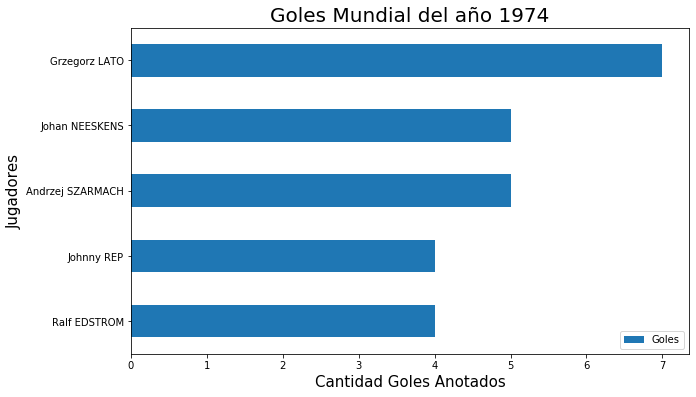

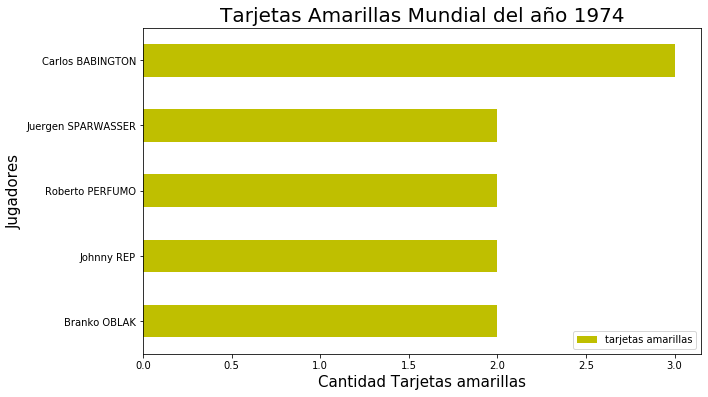

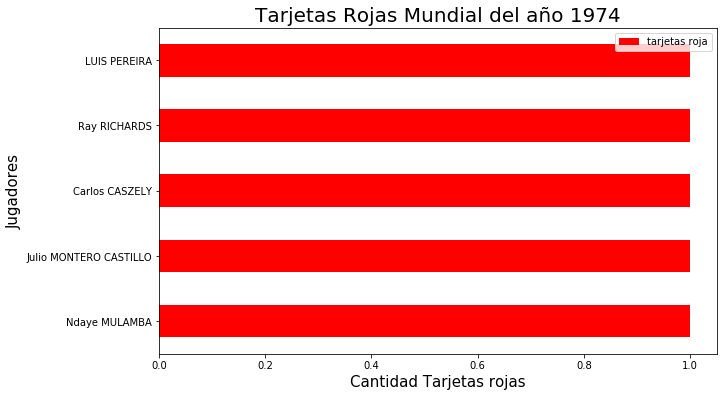

In [201]:
opcion=int(input('Ingrese año de Mundial para ver estadisticas :\n1930 1934 1938 1950 1954 1958 1962 1966 1970 1974\n1978 1982 1986 1990 1994 1998 2002 2006 2010 2014:\n'))
estadisticas(opcion)

# 9) Evalúe dependencia lineal entre las variables de cada BDD y obtenga una relación para determinar el ganador de cada partido. Relacione el máximo goleador del mundial con el ganador del torneo.

In [415]:
world_cup_matches_1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Resultado
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Ganador
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Ganador
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Ganador
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Ganador
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Ganador


In [0]:
# players_cup[['Year','Home Team Name','Goles']].loc[players_cup.groupby('Year').Goles.agg('idxmax')].reset_index(drop=True)

Analicemos si el equipo ganador del mundial es el que hizo mas Goles 

In [533]:
año_a=1930
pais=world_cup[world_cup['Year']==año_a].loc[:,'Winner'].reset_index(drop=True)
print(f'Ganardor del mundial del año {año_a} es: {pais}')
pd.pivot_table(players_cup[players_cup['Year']==año_a],index=['Year','Home Team Name'],values='Goles', aggfunc='sum').sort_values(['Year','Goles'],ascending=False).head()

Ganardor del mundial del año 1930 es: 0    Uruguay
Name: Winner, dtype: object


Goles
Year Home Team Name       
1930 Argentina          21
     Uruguay            18
     Yugoslavia          7
     USA                 6
     France              5

En el caso del mundial del 1930 vemos que el Ganador del mundial no es el que mas goles hizo

Revisemos otro caso

In [534]:
año_a=1990
pais=world_cup[world_cup['Year']==año_a].loc[:,'Winner'].reset_index(drop=True)
print(f'Ganardor del mundial del año {año_a} es: {pais}')
pd.pivot_table(players_cup[players_cup['Year']==año_a],index=['Year','Home Team Name'],values='Goles', aggfunc='sum').sort_values(['Year','Goles'],ascending=False).head()

Ganardor del mundial del año 1990 es: 0    Germany FR
Name: Winner, dtype: object


Goles
Year Home Team Name       
1990 Germany FR         20
     Italy              12
     Cameroon           10
     Belgium             9
     England             9

Aqui se ve que el goleador tambien es el Ganador del mundial.

Una ultima prueba:

In [535]:
año_a=2002
pais=world_cup[world_cup['Year']==año_a].loc[:,'Winner'].reset_index(drop=True)
print(f'Ganardor del mundial del año {año_a} es: {pais}')
pd.pivot_table(players_cup[players_cup['Year']==año_a],index=['Year','Home Team Name'],values='Goles', aggfunc='sum').sort_values(['Year','Goles'],ascending=False).head()

Ganardor del mundial del año 2002 es: 0    Brazil
Name: Winner, dtype: object


Goles
Year Home Team Name       
2002 Germany            15
     Korea Republic     14
     Brazil             10
     Costa Rica          9
     Spain               9

Aqui vemos que el Ganador no es el que mas goles hizo

In [0]:
# r=pd.pivot_table(players_cup,index=['Year','Home Team Name'],values='Goles', aggfunc='sum').sort_values(['Year','Goles'],ascending=[True,False])
# r.loc[1930].idxmax()

In [215]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


In [220]:
mundial=e.groupby('Year')
mundial.get_group(1930).drop(columns=['Year','Shirt Number','penales perdidos','tarjetas amarillas'],axis=0).corr().round(3).style.background_gradient(cmap='YlOrBr')

,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID_x,MatchID,RoundID_y,Goles,tarjetas roja,penales acertados,autogol
Home Team Goals,1,0.52,0.582,0.383,0.307,0.021,-0.094,0.021,0.346,-0.086,0.193,-0.086
Away Team Goals,0.52,1,0.275,0.218,0.692,0.41,-0.461,0.41,0.125,0.008,0.31,-0.142
Attendance,0.582,0.275,1,0.251,0.526,0.379,-0.101,0.379,0.127,-0.181,0.016,-0.147
Half-time Home Goals,0.383,0.218,0.251,1,0.055,-0.239,0.31,-0.239,0.164,-0.093,0.146,-0.093
Half-time Away Goals,0.307,0.692,0.526,0.055,1,0.804,-0.421,0.804,0.058,-0.089,0.111,-0.089
RoundID_x,0.021,0.41,0.379,-0.239,0.804,1,-0.343,1,-0.157,-0.049,-0.049,-0.049
MatchID,-0.094,-0.461,-0.101,0.31,-0.421,-0.343,1,-0.343,-0.061,0.145,-0.159,0.069
RoundID_y,0.021,0.41,0.379,-0.239,0.804,1,-0.343,1,-0.157,-0.049,-0.049,-0.049
Goles,0.346,0.125,0.127,0.164,0.058,-0.157,-0.061,-0.157,1,-0.283,0.16,-0.283
tarjetas roja,-0.086,0.008,-0.181,-0.093,-0.089,-0.049,0.145,-0.049,-0.283,1,-0.019,-0.019


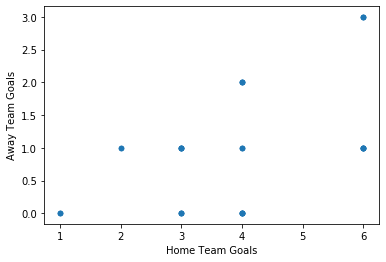

In [221]:
mundial.get_group(1930).plot.scatter(x='Home Team Goals', y='Away Team Goals')

# 10) Realice un reporte en donde clarifique sus conclusiones por mundial y de manera clara se de cuenta una descripción estadística específica y a su vez muestre la metodología expuesta para determinar dichas observaciones.
